<a href="https://colab.research.google.com/github/ThiagoSViana/Infnet-Project/blob/main/Clustering_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clustering Toronto!!!

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import random
import json 
import requests
import geopy.geocoders as geocoder
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import os 
import tqdm 
import warnings 
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from tqdm._tqdm_notebook import tqdm_notebook
from geopy.extra.rate_limiter import RateLimiter
from yellowbrick.cluster import KElbowVisualizer
from folium import plugins
from folium.plugins import MiniMap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
toronto_clean = pd.read_csv('/content/drive/MyDrive/toronto_clean.csv')
toronto_clean.head()

,index,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [ ]:
#Postcode x latlong
coords_Cor = pd.read_csv('/content/drive/MyDrive/Geospatial_Coordinates_Cor.csv')
coords_Cor.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [ ]:
toronto_data_merge_ll = pd.read_csv('/content/drive/MyDrive/toronto_data_merge.csv')
toronto_data_merge_ll.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Heights,43.718518,-79.464763
4,M6A,North York,Lawrence Manor,43.718518,-79.464763


In [ ]:
toronto_data_merge = pd.read_csv('/content/drive/MyDrive/toronto_venues_data_merge.csv')
toronto_data_merge.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adelaide,100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
Agincourt North,4,4,4,4,4,4
Albion Gardens,10,10,10,10,10,10
Alderwood,6,6,6,6,6,6
Bathurst Manor,20,20,20,20,20,20
Bathurst Quay,15,15,15,15,15,15
Bayview Village,4,4,4,4,4,4
Beaumond Heights,10,10,10,10,10,10


In [ ]:
Neighbourhood_Crime_Rates = pd.read_csv('/content/drive/MyDrive/Neighbourhood_Crime_Rates.csv', sep=',', encoding='utf-8')
Neighbourhood_Crime_Rates['Neighbourhood'].head()

0             Yonge-St.Clair
1    York University Heights
2           Lansing-Westgate
3         Yorkdale-Glen Park
4        Stonegate-Queensway
Name: Neighbourhood, dtype: object

In [ ]:
Neighbourhood_Crime_Rates_merged = pd.read_csv('/content/drive/MyDrive/Neighbourhood_Crime_Rates_merged.csv')
Neighbourhood_Crime_Rates_merged.head()

,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_CHG,Assault_Rate_2019,AutoTheft_2014,AutoTheft_2015,AutoTheft_2016,AutoTheft_2017,AutoTheft_2018,AutoTheft_2019,AutoTheft_AVG,AutoTheft_CHG,AutoTheft_Rate_2019,BreakandEnter_2014,BreakandEnter_2015,BreakandEnter_2016,BreakandEnter_2017,BreakandEnter_2018,BreakandEnter_2019,BreakandEnter_AVG,BreakandEnter_CHG,BreakandEnter_Rate_2019,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_2019,Homicide_AVG,Homicide_CHG,Homicide_Rate_2019,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,Robbery_2018,Robbery_2019,Robbery_AVG,Robbery_CHG,Robbery_Rate_2019,TheftOver_2014,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length,Postcode,Borough,Latitude,Longitude
0,7,The Beaches,63,21567,83,108,86,111,94,81,93.8,-0.14,375.6,8,23,7,10,30,20,16.3,-0.33,92.7,44,42,77,33,43,57,49.3,0.33,264.3,0,0,0,0,0,0,0.0,0.0,0.0,15,14,19,48,10,16,20.3,0.6,74.2,8,5,3,7,5,9,6.2,0.80,41.7,3.595829e+06,11275.180743,M4E,East Toronto,43.676357,-79.293031
1,9,Thorncliffe Park,55,21108,86,105,87,99,93,115,97.5,0.24,544.8,12,11,4,7,9,13,9.3,0.44,61.6,33,27,24,19,23,27,25.5,0.17,127.9,3,1,1,4,0,0,1.5,0.0,0.0,16,7,16,9,5,13,11.0,1.6,61.6,9,6,11,9,3,5,7.2,0.67,23.7,3.126554e+06,7502.709430,M4H,East York,43.705369,-79.349372
2,11,Humewood-Cedarvale,106,14365,43,52,52,38,47,46,46.3,-0.02,320.2,11,7,17,22,24,16,16.2,-0.33,111.4,31,39,27,39,33,26,32.5,-0.21,181.0,0,1,0,1,0,0,0.3,0.0,0.0,8,11,8,6,4,10,7.8,1.5,69.6,3,3,5,6,7,4,4.7,-0.43,27.8,1.871263e+06,6036.268116,M6C,York,43.693781,-79.428191
3,15,Scarborough Village,139,16724,161,153,192,152,178,175,168.5,-0.02,1046.4,20,15,9,21,20,18,17.2,-0.10,107.6,49,48,34,32,45,40,41.3,-0.11,239.2,1,0,6,1,0,0,1.3,0.0,0.0,30,33,22,23,14,28,25.0,1.0,167.4,3,2,2,4,3,2,2.7,-0.33,12.0,3.151015e+06,7922.764442,M1J,Scarborough,43.744734,-79.239476
4,20,Humber Summit,21,12416,76,89,118,116,109,118,104.3,0.08,950.4,66,42,62,83,106,135,82.3,0.27,1087.3,54,44,41,40,56,57,48.7,0.02,459.1,0,1,0,2,1,3,1.2,2.0,24.2,22,23,23,27,31,28,25.7,-0.1,225.5,15,16,18,18,15,22,17.3,0.47,177.2,7.966905e+06,12608.573118,M9L,North York,43.756303,-79.565963


In [ ]:
Toronto_apartment_rentals = pd.read_csv('/content/drive/MyDrive/Toronto_apartment_rentals.csv', sep=',', encoding='utf-8')
Toronto_apartment_rentals.head()

,Bedroom,Bathroom,Den,Latitude,Longitude,Price
0,2,2.0,0,43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,43.652487,-79.389622,"$1,800.00"


In [ ]:
toronto_grouped = pd.read_csv('/content/drive/MyDrive/toronto_grouped.csv')
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint
0,Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.01,0.0,0.01,0.0,0.0,0.0,

In [ ]:
neighborhoods_venues_sorted = pd.read_csv('/content/drive/MyDrive/neighborhoods_venues_sorted.csv')
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Coffee Shop,Hotel,Café,Gym,Restaurant,Clothing Store,Thai Restaurant,Breakfast Spot,Bookstore,Steakhouse
1,Agincourt,Latin American Restaurant,Breakfast Spot,Lounge,Clothing Store,Yoga Studio,Movie Theater,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant
2,Agincourt North,Playground,Intersection,Bakery,Park,Modern European Restaurant,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Mobile Phone Shop
3,Albion Gardens,Grocery Store,Fast Food Restaurant,Fried Chicken Joint,Beer Store,Greek Restaurant,Liquor Store,Pizza Place,Pharmacy,Sandwich Place,Men's Store
4,Alderwood,Pizza Place,Gym,Coffee Shop,Pub,Sandwich Place,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Men's Store,Miscellaneous Shop


In [ ]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
toronto_grouped_clustering.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.01,

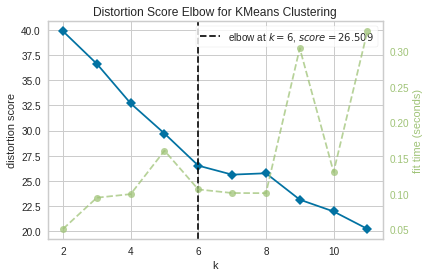

In [ ]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(2,12))
yellow_visualizer.fit(toronto_grouped_clustering)
yellow_visualizer.show()

In [ ]:
# setting number of clusters
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
# applying kmeans

#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data_merge_ll

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
toronto_merged.drop([187], inplace=True)
toronto_merged.reset_index()

toronto_merged.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,4.0,Fast Food Restaurant,Park,Food & Drink Shop,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Mexican Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,2.0,Pizza Place,Portuguese Restaurant,Financial or Legal Service,Coffee Shop,Hockey Arena,Intersection,Modern European Restaurant,Movie Theater,Motel,Moroccan Restaurant
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,2.0,Coffee Shop,Café,Bakery,Park,Pub,Theater,Chocolate Shop,Beer Store,French Restaurant,Spa
3,M6A,North York,Lawrence Heights,43.718518,-79.464763,2.0,Clothing Store,Furniture / Home Store,Boutique,Miscellaneous Shop,Athletics & Sports,Arts & Crafts Store,Event Space,Coffee Shop,Vietnamese Restaurant,Accessories Store
4,M6A,North York,Lawrence Manor,43.718518,-79.464763,2.0,Clothing Store,Furniture / Home Store,Boutique,Miscellaneous Shop,Athletics & Sports,Arts & Crafts Store,Event Space,Coffee Shop,Vietnamese Restaurant,Accessories Store


In [ ]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [ ]:
# creating the folium map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)



# setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, Neighbourhood, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(Neighbourhood) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine Clusters
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

Cluster 1

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Scarborough,0.0,Bar,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop,Museum
21,Scarborough,0.0,Bar,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop,Museum
22,Scarborough,0.0,Bar,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop,Museum


In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Etobicoke,1.0,Filipino Restaurant,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant,Playground
15,Etobicoke,1.0,Filipino Restaurant,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant,Playground
16,Etobicoke,1.0,Filipino Restaurant,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant,Playground
17,Etobicoke,1.0,Filipino Restaurant,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant,Playground
18,Etobicoke,1.0,Filipino Restaurant,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant,Playground
19,Etobicoke,1.0,Filipino Restaurant,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant,Playground


In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
#country[country['cluster']==3]
#toronto_merged[toronto_merged['Cluster Labels'] == 4]

##Toronto rent

In [ ]:
rent = Toronto_apartment_rentals
rent.head()

,Bedroom,Bathroom,Den,Latitude,Longitude,Price
0,2,2.0,0,43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,43.652487,-79.389622,"$1,800.00"


In [ ]:
def real_to_int(money):
  return  int(money[1:6].replace('.','').replace(',',''))

Rent_price = rent['Price'].apply(real_to_int)
Rent_price.head()

0    2450
1    2150
2    1950
3    2900
4    1800
Name: Price, dtype: int64

In [ ]:
rent['Rent_price'] = Rent_price
rent.head()

,Bedroom,Bathroom,Den,Latitude,Longitude,Price,Rent_price
0,2,2.0,0,43.581639,-79.648193,"$2,450.00",2450
1,1,1.0,1,43.643051,-79.391643,"$2,150.00",2150
2,1,1.0,0,43.660605,-79.378635,"$1,950.00",1950
3,2,2.0,0,43.641087,-79.381405,"$2,900.00",2900
4,1,1.0,0,43.652487,-79.389622,"$1,800.00",1800


In [ ]:
rent = rent.drop('Price', 1)

In [ ]:
rent.head()

,Bedroom,Bathroom,Den,Latitude,Longitude,Rent_price
0,2,2.0,0,43.581639,-79.648193,2450
1,1,1.0,1,43.643051,-79.391643,2150
2,1,1.0,0,43.660605,-79.378635,1950
3,2,2.0,0,43.641087,-79.381405,2900
4,1,1.0,0,43.652487,-79.389622,1800


In [ ]:
rent = pd.read_csv('/content/drive/MyDrive/rent.csv')
rent.head()

,Bedroom,Bathroom,Den,Latitude,Longitude,Rent_price
0,2,2.0,0,43.581639,-79.648193,2450
1,1,1.0,1,43.643051,-79.391643,2150
2,1,1.0,0,43.660605,-79.378635,1950
3,2,2.0,0,43.641087,-79.381405,2900
4,1,1.0,0,43.652487,-79.389622,1800


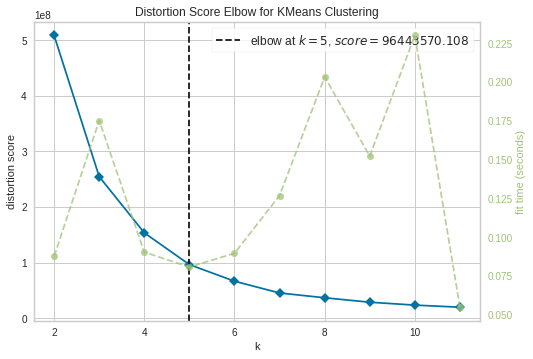

In [ ]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(2,12))
yellow_visualizer.fit(rent)
yellow_visualizer.show()

In [ ]:
# setting number of clusters
kclusters = 5
# running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rent)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 2, 3, 3, 3, 0, 0, 0], dtype=int32)

In [ ]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(rent)

In [ ]:
rent['cluster'] = clusters

In [ ]:
rent.head()

,Bedroom,Bathroom,Den,Latitude,Longitude,Rent_price,cluster
0,2,2.0,0,43.581639,-79.648193,2450,1
1,1,1.0,1,43.643051,-79.391643,2150,1
2,1,1.0,0,43.660605,-79.378635,1950,2
3,2,2.0,0,43.641087,-79.381405,2900,3
4,1,1.0,0,43.652487,-79.389622,1800,2


In [ ]:
#rent to csv

In [ ]:
rent.dtypes

Bedroom         int64
Bathroom      float64
Den             int64
Latitude      float64
Longitude     float64
Rent_price      int64
cluster         int32
dtype: object

In [ ]:
convert_price = str

In [ ]:
# create map
map_clusters_rent = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, Rent_price, Bathroom, Bedroom, cluster in zip(rent['Latitude'], rent['Longitude'], rent['Rent_price'], rent['Bathroom'], rent['Bedroom'],rent['cluster']):
    label = folium.Popup(str(Rent_price) + "$" + 
                         '\n'+ 'Bedroom(s)' + str(Bedroom))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters_rent)
       
map_clusters_rent

In [ ]:
rent[rent['cluster']==0].shape

(20, 7)

In [ ]:
rent[rent['cluster']==1].shape

(179, 7)

In [ ]:
rent[rent['cluster']==2].shape

(415, 7)

In [ ]:
rent[rent['cluster']==3].shape

(179, 7)

In [ ]:
rent[rent['cluster']==4].shape

(20, 7)

In [ ]:
rent[rent['cluster']==5].shape

(0, 7)